In [1]:
from itertools import product
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

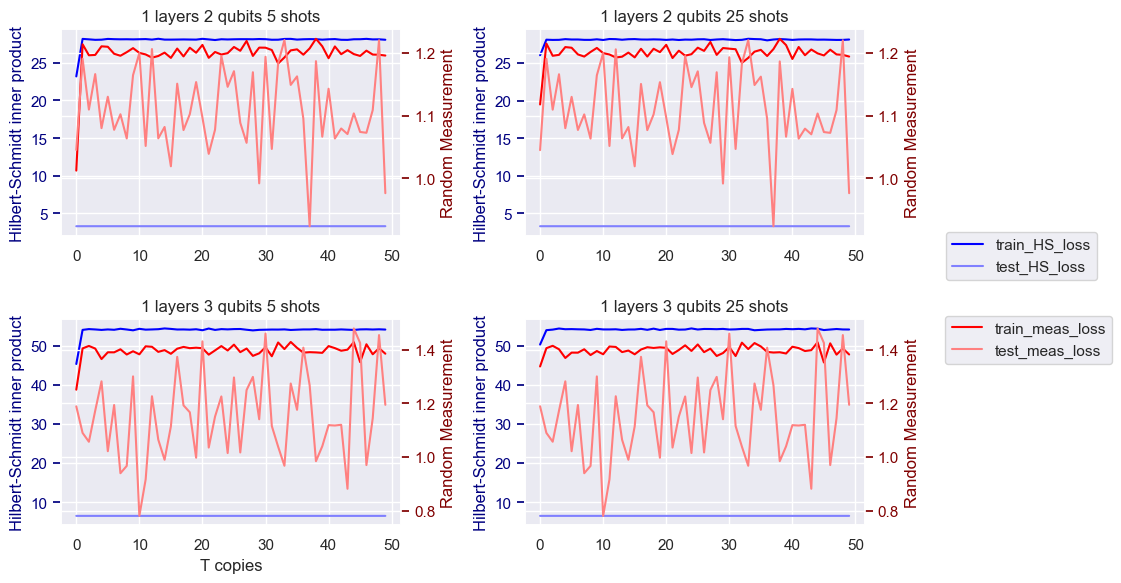

In [2]:
loop_pair = [
    (1,2,5),
    (1,2,25),
    (1,3,5),
    (1,3,25),
]

def ax_plot(ax, l, q, s, legend=False):
    result = np.load(f"result_ml_l{l}_q{q}_s{s}.npy")
    ax_twinx = ax.twinx()
    light_blue, blue, dark_blue = (0.5,0.5,1), (0,0,1), (0,0,0.5)
    light_red , red , dark_red  = (1,0.5,0.5), (1,0,0), (0.5,0,0)
    ax.plot(range(50), -result[0], label="train_HS_loss", color=blue)
    ax.plot(range(50), -result[1], label="test_HS_loss", color=light_blue)
    ax_twinx.plot(range(50), result[2], label="train_meas_loss", color=red)
    ax_twinx.plot(range(50), result[3], label="test_meas_loss", color=light_red)
    ax.set_title(f"{l} layers {q} qubits {s} shots")
    ax_twinx.tick_params(axis="y", colors=dark_red)
    ax_twinx.set_ylabel("Random Measurement", color=dark_red)
    ax.tick_params(axis="y", colors=dark_blue)
    ax.set_ylabel("Hilbert-Schmidt inner product", color=dark_blue)
    if legend:
        ax_twinx.legend(loc='center right', bbox_to_anchor=(1.75, 0.9))

fig, ax = plt.subplots(2,2,figsize=(2*6,2*3))
ax_plot(ax[0][0], *loop_pair[0])
ax_plot(ax[0][1], *loop_pair[1])
ax_plot(ax[1][0], *loop_pair[2])
ax_plot(ax[1][1], *loop_pair[3], True)

ax[0][1].legend(loc='center right', bbox_to_anchor=(1.705, -0.1))
ax[1][0].set_xlabel("T copies")

plt.tight_layout()
plt.savefig(f"result_machine_learning.png")